In [7]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.models import resnet18
import torch.nn as nn
import torch.optim as optim

In [8]:
# Define only basic transformations (no augmentation needed)
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Ensure consistent input size for ResNet
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

In [9]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [10]:
# Define only basic transformations (no augmentation needed)
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Ensure consistent input size for ResNet
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Load data from directories
train_dataset = datasets.ImageFolder(root=r'Data for task2\augmented_training_organized', transform=data_transform)
val_dataset = datasets.ImageFolder(root=r'Data for task2\testing_organized', transform=data_transform)
test_dataset = datasets.ImageFolder(root=r'Data for task2\validation_organized', transform=data_transform)

# Create DataLoader objects
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Check class mappings
print("Class mappings:", train_dataset.class_to_idx)

Class mappings: {'user001': 0, 'user002': 1, 'user003': 2, 'user004': 3, 'user005': 4, 'user006': 5, 'user007': 6, 'user008': 7, 'user009': 8, 'user010': 9, 'user011': 10, 'user012': 11, 'user013': 12, 'user014': 13, 'user015': 14, 'user016': 15, 'user017': 16, 'user018': 17, 'user019': 18, 'user020': 19, 'user021': 20, 'user022': 21, 'user023': 22, 'user024': 23, 'user025': 24, 'user026': 25, 'user027': 26, 'user028': 27, 'user029': 28, 'user030': 29, 'user031': 30, 'user032': 31, 'user033': 32, 'user034': 33, 'user035': 34, 'user036': 35, 'user037': 36, 'user038': 37, 'user039': 38, 'user040': 39, 'user041': 40, 'user042': 41, 'user043': 42, 'user044': 43, 'user045': 44, 'user046': 45, 'user047': 46, 'user048': 47, 'user049': 48, 'user050': 49, 'user051': 50, 'user052': 51, 'user053': 52, 'user054': 53, 'user055': 54, 'user056': 55, 'user057': 56, 'user058': 57, 'user059': 58, 'user060': 59, 'user061': 60, 'user062': 61, 'user063': 62, 'user064': 63, 'user065': 64, 'user066': 65, 'us

In [11]:
# Load ResNet18 model
num_classes = len(train_dataset.classes)  # Automatically get the number of classes
model = resnet18(weights=None)  # Initialize ResNet18 with random weights
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Modify the final layer
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [12]:
# Training loop
num_epochs = 10
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / total
    train_accuracy = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation phase
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss = val_loss / total
    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}:")
    print(f"  Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"  Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")
    # Save the model and optimizer states after training
    torch.save({
        'epoch': num_epochs,  # Save the current epoch number
        'model_state_dict': model.state_dict(),  # Save model's parameters
        'optimizer_state_dict': optimizer.state_dict(),  # Save optimizer's parameters
        'loss': train_losses[-1],  # Save the last recorded loss (optional)
    }, f'model_checkpoint{epoch+1}_task3.pth')  # File name for the checkpoint
    print("Model saved successfully!")


Epoch 1/10:
  Train Loss: 2.8722, Train Accuracy: 0.2349
  Val Loss: 2.8802, Val Accuracy: 0.2549
Model saved successfully!
Epoch 2/10:
  Train Loss: 1.5920, Train Accuracy: 0.5304
  Val Loss: 1.5356, Val Accuracy: 0.5515
Model saved successfully!
Epoch 3/10:
  Train Loss: 0.8629, Train Accuracy: 0.7407
  Val Loss: 1.2645, Val Accuracy: 0.6618
Model saved successfully!
Epoch 4/10:
  Train Loss: 0.3861, Train Accuracy: 0.8876
  Val Loss: 1.0033, Val Accuracy: 0.7390
Model saved successfully!
Epoch 5/10:
  Train Loss: 0.1859, Train Accuracy: 0.9471
  Val Loss: 1.2587, Val Accuracy: 0.6740
Model saved successfully!
Epoch 6/10:
  Train Loss: 0.1120, Train Accuracy: 0.9683
  Val Loss: 0.8532, Val Accuracy: 0.7831
Model saved successfully!
Epoch 7/10:
  Train Loss: 0.0963, Train Accuracy: 0.9722
  Val Loss: 1.0713, Val Accuracy: 0.7500
Model saved successfully!
Epoch 8/10:
  Train Loss: 0.0895, Train Accuracy: 0.9731
  Val Loss: 0.9959, Val Accuracy: 0.7488
Model saved successfully!
Epoch 9/

Test Loss: 0.9241, Test Accuracy: 0.7789


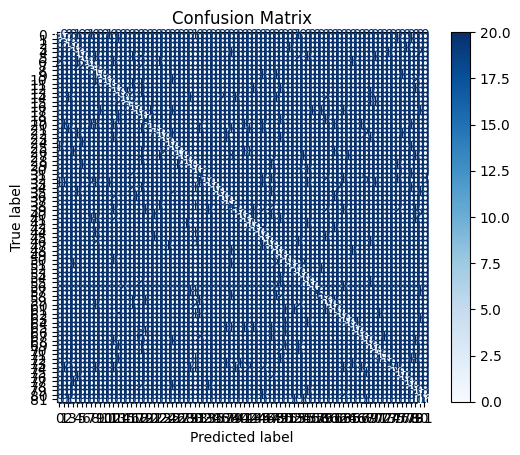

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        20
           1       0.85      0.85      0.85        20
           2       0.77      1.00      0.87        20
           3       0.86      0.90      0.88        20
           4       0.70      0.80      0.74        20
           5       0.73      0.55      0.63        20
           6       1.00      0.70      0.82        20
           7       0.74      0.70      0.72        20
           8       0.61      1.00      0.75        20
           9       0.94      0.80      0.86        20
          10       1.00      0.80      0.89        20
          11       0.89      0.80      0.84        20
          12       0.61      0.85      0.71        20
          13       0.60      0.75      0.67        20
          14       0.86      0.60      0.71        20
          15       0.93      0.65      0.76        20
          16       0.61      1.00      0.75        20
          17       0.93    

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Testing phase
# Test the model
model.eval()
correct = 0
all_preds = []
all_labels = []
test_loss, correct, total = 0.0, 0, 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        test_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())  # Collect predictions
        all_labels.extend(labels.cpu().numpy())  # Collect true labels

test_loss = test_loss / total
test_accuracy = correct / total
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(len(cm)))

# Display the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
# print precision, recall, f1
from sklearn.metrics import classification_report
print(classification_report(all_labels, all_preds))


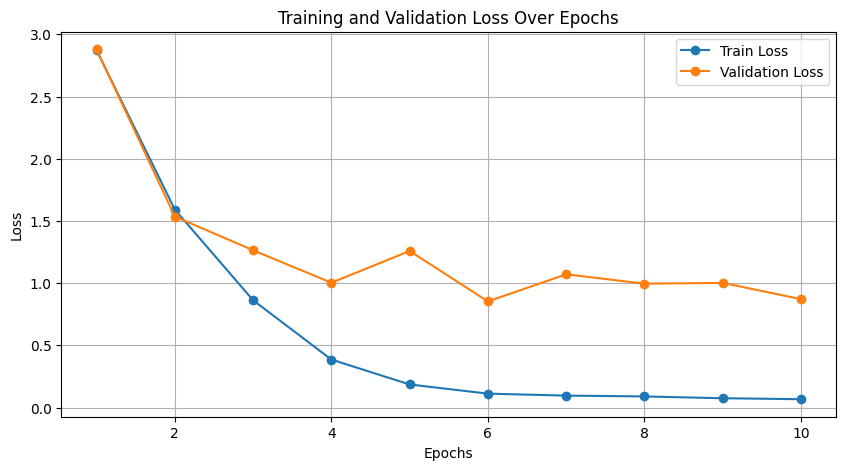

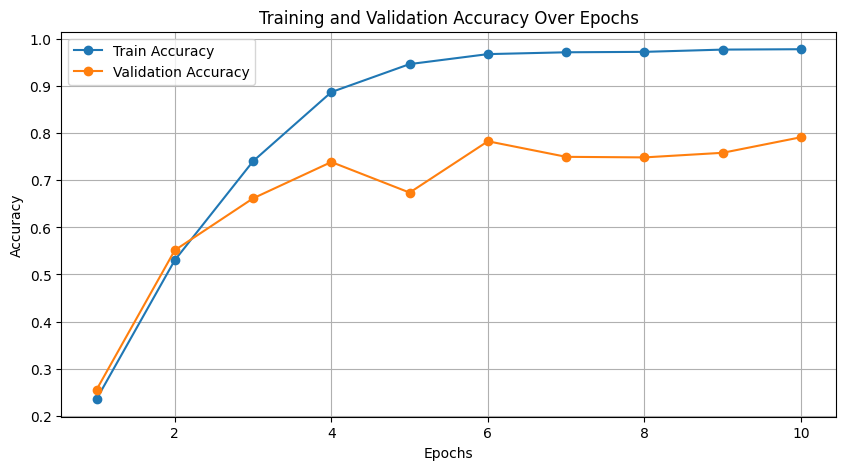

In [13]:
import matplotlib.pyplot as plt

# Data extracted from the training log
epochs = list(range(1, 11))
train_losses = [2.8722, 1.5920, 0.8629, 0.3861, 0.1859, 0.1120, 0.0963, 0.0895, 0.0752, 0.0672]
train_accuracies = [0.2349, 0.5304, 0.7407, 0.8876, 0.9471, 0.9683, 0.9722, 0.9731, 0.9779, 0.9787]
val_losses = [2.8802, 1.5356, 1.2645, 1.0033, 1.2587, 0.8532, 1.0713, 0.9959, 1.0022, 0.8714]
val_accuracies = [0.2549, 0.5515, 0.6618, 0.7390, 0.6740, 0.7831, 0.7500, 0.7488, 0.7586, 0.7917]

# Plotting Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, label="Train Loss", marker="o")
plt.plot(epochs, val_losses, label="Validation Loss", marker="o")
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracies, label="Train Accuracy", marker="o")
plt.plot(epochs, val_accuracies, label="Validation Accuracy", marker="o")
plt.title("Training and Validation Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Mobilenetv2


In [12]:
from torchvision.models import mobilenet_v2


In [14]:
# Load MobileNetV2 model
num_classes = len(train_dataset.classes)  # Automatically get the number of classes
model = mobilenet_v2(weights=None)  # Initialize MobileNetV2 with random weights
model.classifier[1] = nn.Linear(model.last_channel, num_classes)  # Adjust final layer
model = model.to(device)
print(num_classes   )


82


In [15]:
# Training loop
num_epochs = 10
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / total
    train_accuracy = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation phase
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss = val_loss / total
    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}:")
    print(f"  Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"  Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")
# Save the model and optimizer states after training
torch.save({
    'epoch': num_epochs,  # Save the current epoch number
    'model_state_dict': model.state_dict(),  # Save model's parameters
    'optimizer_state_dict': optimizer.state_dict(),  # Save optimizer's parameters
    'loss': train_losses[-1],  # Save the last recorded loss (optional)
}, 'model_checkpoint.pth')  # File name for the checkpoint
print("Model saved successfully!")


Epoch 1/10:
  Train Loss: 4.4430, Train Accuracy: 0.0108
  Val Loss: 4.4367, Val Accuracy: 0.0098
Epoch 2/10:
  Train Loss: 4.4435, Train Accuracy: 0.0111
  Val Loss: 4.4381, Val Accuracy: 0.0086
Epoch 3/10:
  Train Loss: 4.4438, Train Accuracy: 0.0113
  Val Loss: 4.4375, Val Accuracy: 0.0086
Epoch 4/10:
  Train Loss: 4.4440, Train Accuracy: 0.0117
  Val Loss: 4.4386, Val Accuracy: 0.0086
Epoch 5/10:
  Train Loss: 4.4430, Train Accuracy: 0.0114
  Val Loss: 4.4367, Val Accuracy: 0.0110
Epoch 6/10:
  Train Loss: 4.4419, Train Accuracy: 0.0114
  Val Loss: 4.4388, Val Accuracy: 0.0061
Epoch 7/10:
  Train Loss: 4.4424, Train Accuracy: 0.0103
  Val Loss: 4.4376, Val Accuracy: 0.0061
Epoch 8/10:
  Train Loss: 4.4438, Train Accuracy: 0.0114
  Val Loss: 4.4392, Val Accuracy: 0.0074
Epoch 9/10:
  Train Loss: 4.4440, Train Accuracy: 0.0111
  Val Loss: 4.4393, Val Accuracy: 0.0037
Epoch 10/10:
  Train Loss: 4.4434, Train Accuracy: 0.0108
  Val Loss: 4.4385, Val Accuracy: 0.0098
Model saved success

In [16]:
# Testing phase
model.eval()
test_loss, correct, total = 0.0, 0, 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        test_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

test_loss = test_loss / total
test_accuracy = correct / total
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Test Loss: 4.4399, Test Accuracy: 0.0092
